### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [87]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [88]:
# query basic info
data.info()

# basic stats for dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [89]:

print('===============')
print('# 1. Drop rows where Y is missing')
data = data.dropna(subset=['Y'])

print('===============')
print('# Rename passanger column to passenger')
data.rename(columns={'passanger': 'passenger'}, inplace=True)


print('===============')
print('# Show the first few rows to verify')
print(data.head())

print('===============')
print('# 2. Fill numeric missing values with median')
# Identify all numerical columns in the dataset
num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

print('===============')
print('# 3. Identify the categorical columns in the dataset')
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print('# Fill nulls in each column with its mode - the most common value')
for col in categorical_columns:
    if data[col].isnull().any():
        mode_value = data[col].mode()[0] 
        data.fillna({col: mode_value}, inplace=True)


print('===============')
print('# 4. Confirm no missing values remain')
data.isnull().sum().sum()  # This should be zero

#print('===============')
#print('# Display the first few rows of the changed dataset to verify the changes')
#data.head(20)

data.info()


print('===============')
print('# 5. Iterate through categorical columns and identify all categories recorded')
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"-> {col} <-")
    print(data[col].value_counts(dropna=False))
    print()


#print('===============')
#print('# Encode each categorical column and create a new numeric column')
#label_encoders = {}
#for col in categorical_columns:
#    le = LabelEncoder()
#    data[f"{col}_encoded"] = le.fit_transform(data[col])
#    label_encoders[col] = le 

#print('===============')
#print('# Display the mapping for every column to confirm and for reference')
#for col in categorical_columns:
#    print('===============')
#    print(f"Mapping for '{col}':")
#    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))

print('===============')
print('===============')



# 1. Drop rows where Y is missing
# Rename passanger column to passenger
# Show the first few rows to verify
       destination  passenger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        neve

In [90]:
# display current dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

4. What proportion of the total observations chose to accept the coupon?



//////////////////////////
Proportion of observations accepted : 0.5684
//////////////////////////


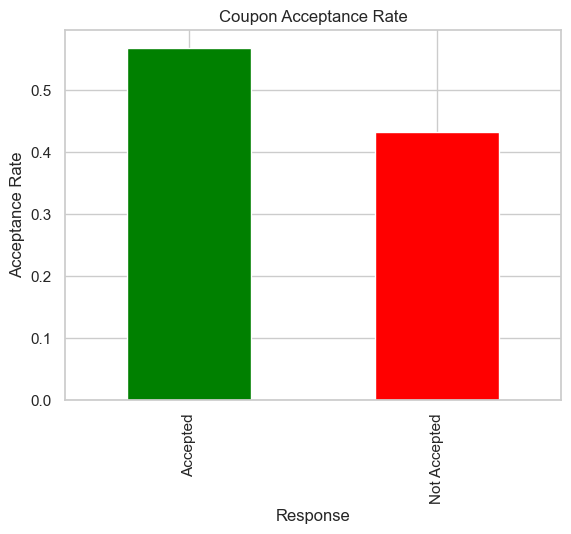

In [104]:
yvaluedata = data['Y'].dropna().values 

# use only accepted coupons
accepted_prop = np.mean(yvaluedata == 1)

print('//////////////////////////')
print(f"Proportion of observations accepted : {accepted_prop:.4f}")
print('//////////////////////////')

# Check target distribution

data['Y-Decoded'] = data['Y'].map({1: 'Accepted', 0: 'Not Accepted'})
plot=data['Y-Decoded'].value_counts(normalize=True).plot(kind='bar', 
                                                    title='Coupon Acceptance Rate', 
                                                    ylabel='Acceptance Rate',
                                                    xlabel='Response',
                                                    color = ('green', 'red'))




5. Use a bar plot to visualize the `coupon` column.

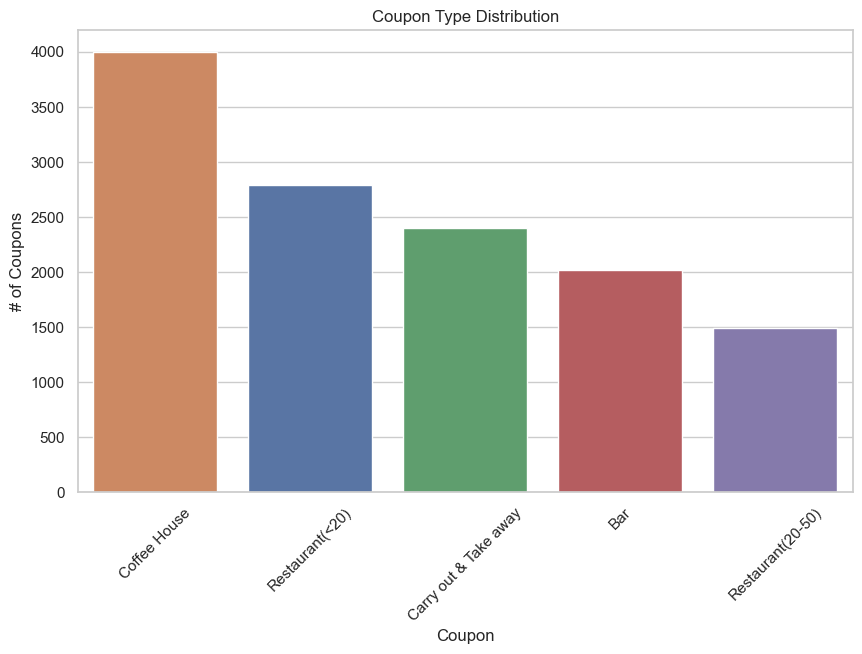

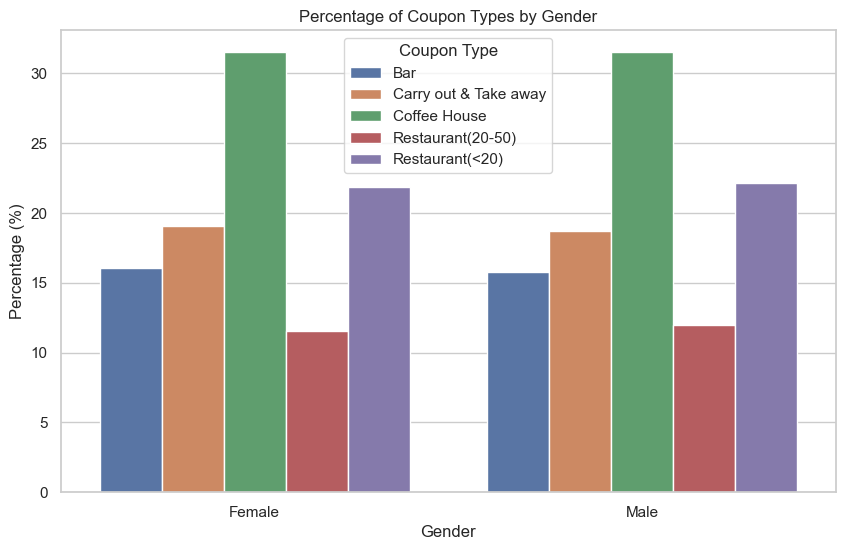

<Figure size 1000x600 with 0 Axes>

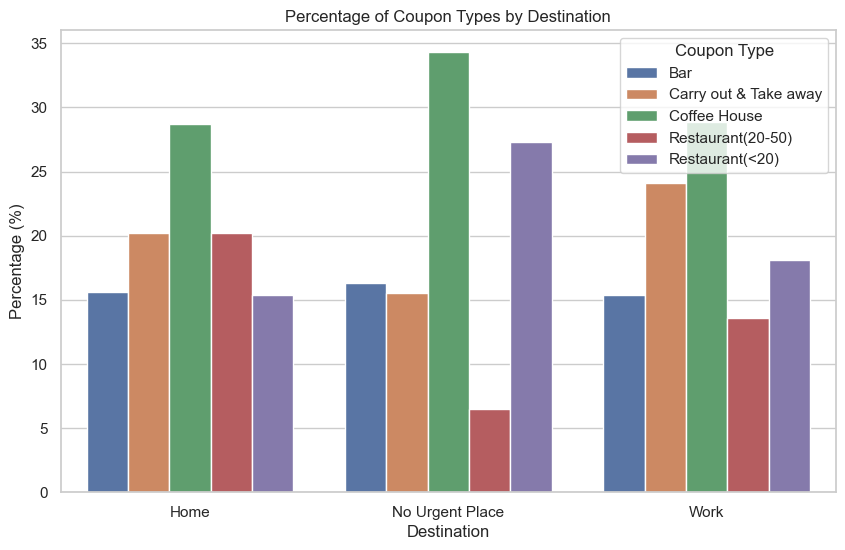

In [92]:

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, hue='coupon')

# Add labels and title
plt.title("Coupon Type Distribution")
plt.xlabel("Coupon")
plt.ylabel("# of Coupons")
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Create a grouped percentage DataFrame by Gender
grouped = (
    data.groupby(['gender', 'coupon'])
    .size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percent')
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='gender', y='percent', hue='coupon')

plt.title("Percentage of Coupon Types by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.legend(title="Coupon Type")
plt.show()


# Create a grouped percentage DataFrame for Age
grouped = (
    data.groupby(['age', 'coupon'])
    .size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percent')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='age', y='percent', hue='coupon')
plt.title("Percentage of Coupon Types by Age Group")
# Create a grouped percentage DataFrame by Destination
grouped = (
    data.groupby(['destination', 'coupon'])
    .size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percent')
)


plt.clf()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='destination', y='percent', hue='coupon')

plt.title("Percentage of Coupon Types by Destination")
plt.ylabel("Percentage (%)")
plt.xlabel("Destination")
plt.legend(title="Coupon Type")
plt.show()

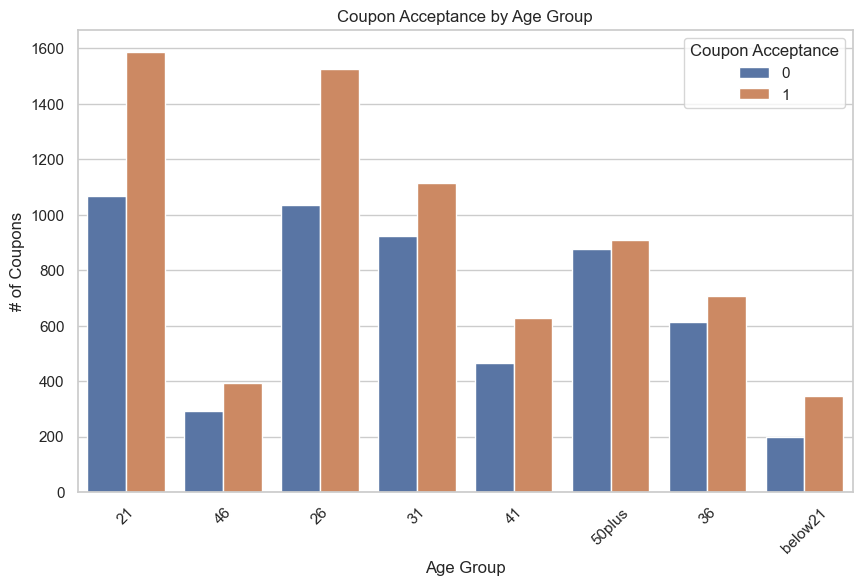

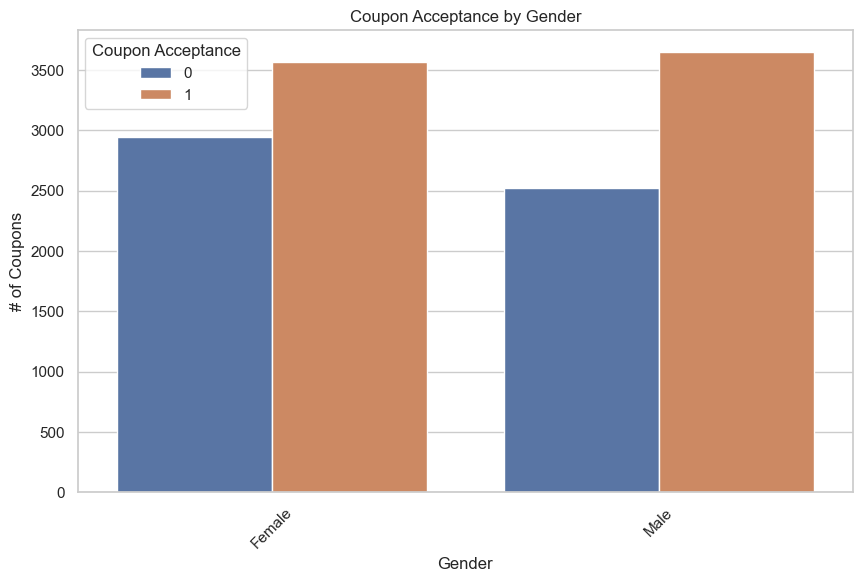

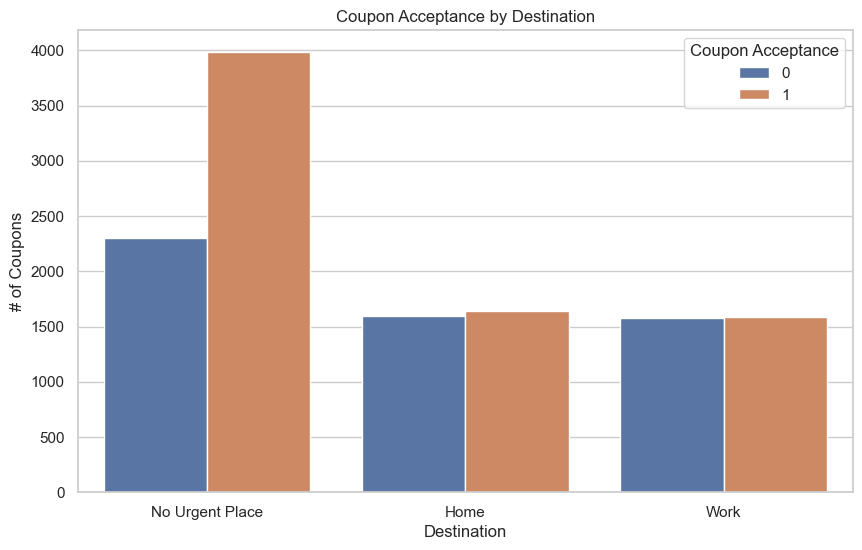

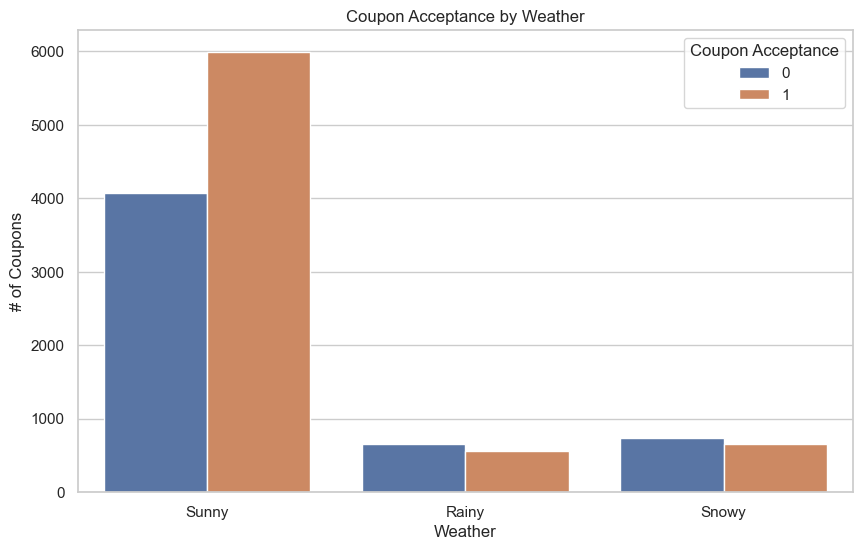

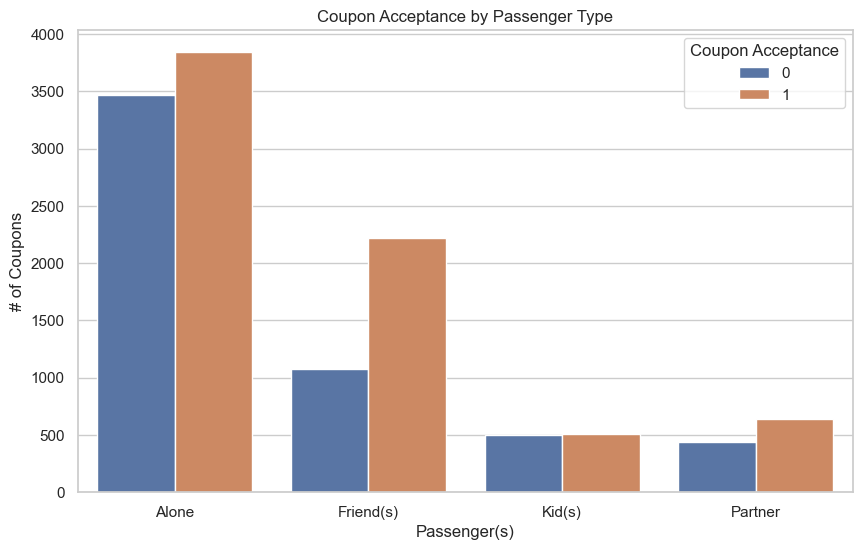

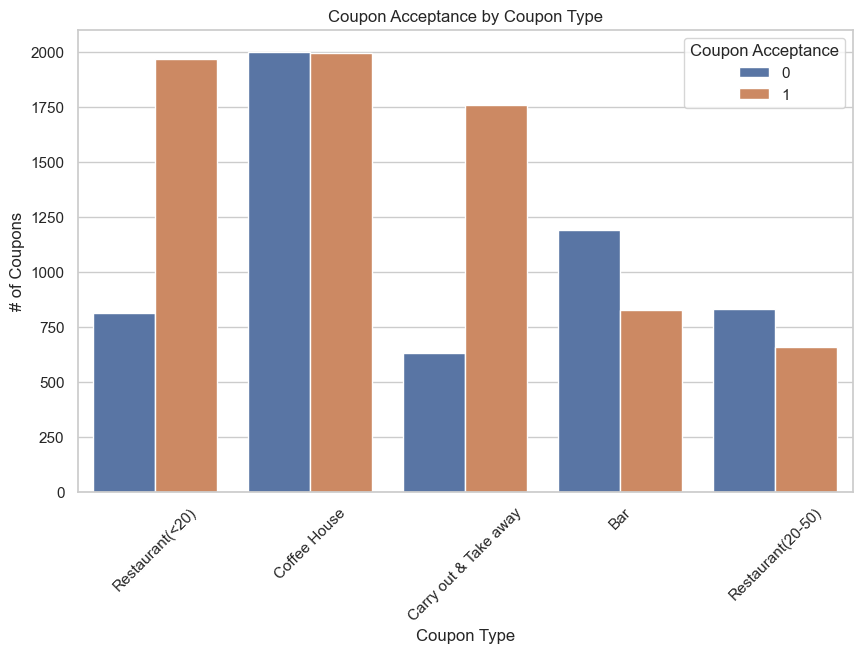

In [93]:
# Set Seaborn style
sns.set(style="whitegrid")

plt.close()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age', hue='Y')
plt.xlabel("Age Group")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Age Group")
plt.xticks(rotation=45)
plt.legend(title='Coupon Acceptance')
plt.show()

plt.close()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='Y')
plt.xlabel("Gender")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Gender")
plt.xticks(rotation=45)
plt.legend(title='Coupon Acceptance')
plt.show()

plt.close()
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='destination', hue='Y')
plt.xlabel("Destination")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Destination")
plt.legend(title='Coupon Acceptance')
plt.show()

plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='weather', hue='Y')
plt.xlabel("Weather")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Weather")
plt.legend(title='Coupon Acceptance')
plt.show()


plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='passenger', hue='Y')  
plt.xlabel("Passenger(s)")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Passenger Type")
plt.legend(title='Coupon Acceptance')
plt.show()


plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='coupon', hue='Y')
plt.xlabel("Coupon Type")
plt.ylabel("# of Coupons")
plt.title("Coupon Acceptance by Coupon Type")
plt.legend(title='Coupon Acceptance')
plt.xticks(rotation=45)
plt.show()




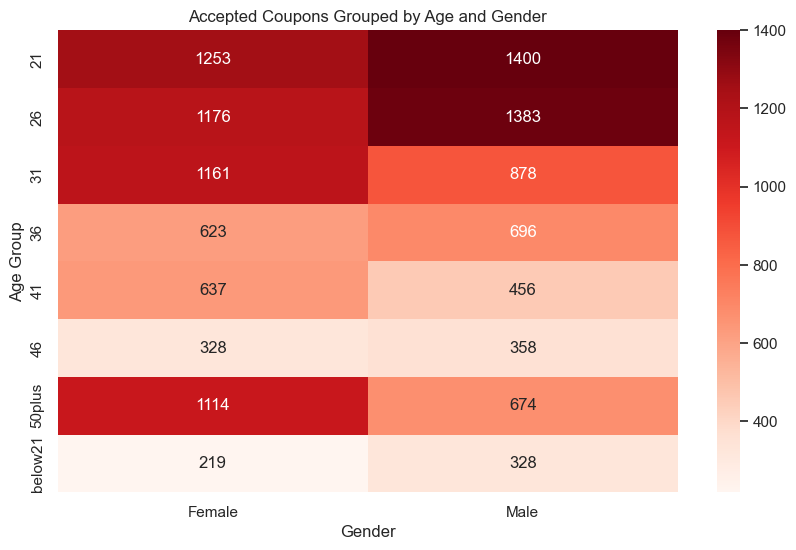

In [94]:

# use only accepted coupons
data[data['Y-Decoded'].str.contains('Accepted', na=False)]

pivot = data.pivot_table(
    index='age',
    columns='gender',
    aggfunc='size',
    fill_value=0
)

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Reds')

plt.title("Accepted Coupons Grouped by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.show()

6. Use a histogram to visualize the temperature column.

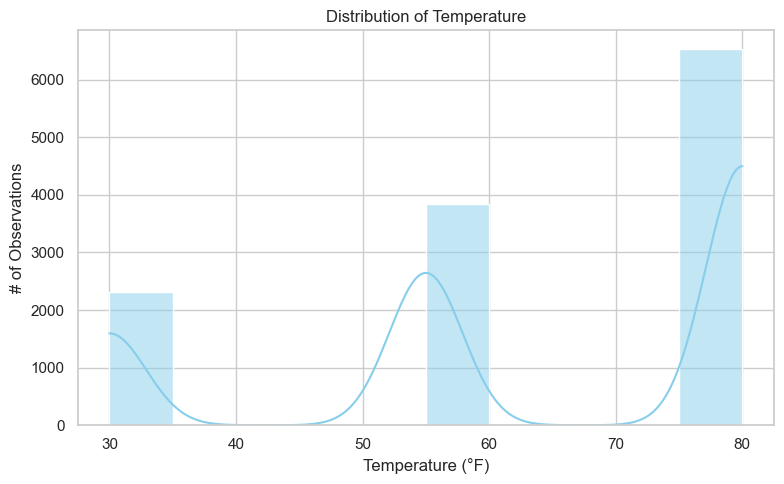

In [96]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', bins=10, kde=True, color='skyblue')

plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("# of Observations")
plt.grid(True)
plt.tight_layout()

plt.show()



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [97]:
# data is already queried and modified above
# Filter for bar coupons (coupon == Bar)
bardata=data[data['coupon'].str.contains('Bar')]
bardata.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Y-Decoded
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,Not Accepted
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,Accepted
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,Not Accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,Accepted
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,Accepted


2. What proportion of bar coupons were accepted?


//////////////////////////
Proportion of observations accepted : 0.4100
//////////////////////////


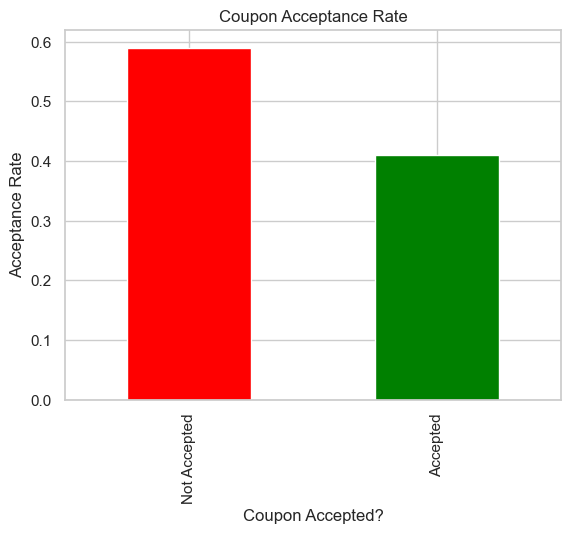

In [102]:
yvaluedata = bardata['Y'].dropna().values 

# use only accepted coupons
accepted_prop = np.mean(yvaluedata == 1)

print('//////////////////////////')
print(f"Proportion of observations accepted : {accepted_prop:.4f}")
print('//////////////////////////')


plot=bardata['Y-Decoded'].value_counts(normalize=True).plot(kind='bar', 
                                                    title='Coupon Acceptance Rate', 
                                                    ylabel='Acceptance Rate',
                                                    xlabel='Coupon Accepted?',
                                                    color = ('red', 'green'))

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


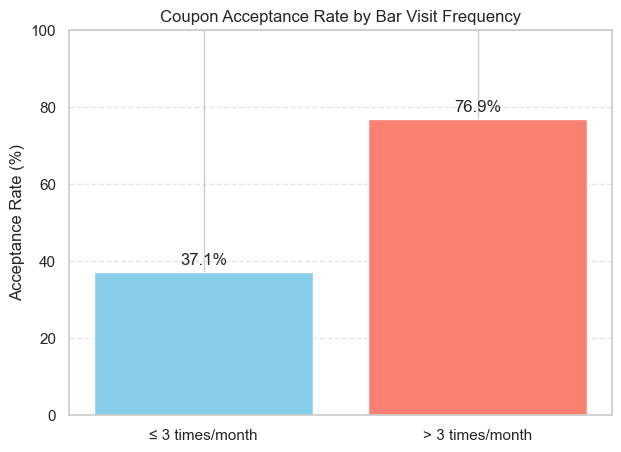

In [444]:

# Define visit frequency groups
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Filter groups
low_group = bardata[bardata['Bar'].isin(low_freq)]
high_group = bardata[bardata['Bar'].isin(high_freq)]

# Calculate acceptance rates (percentages)
low_rate = low_group['Y'].mean() * 100
high_rate = high_group['Y'].mean() * 100

# Plot
plt.figure(figsize=(7, 5))
plt.bar(['≤ 3 times/month', '> 3 times/month'], [low_rate, high_rate], color=['skyblue', 'salmon'])

plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, rate in enumerate([low_rate, high_rate]):
    plt.text(i, rate + 2, f"{rate:.1f}%", ha='center', fontsize=12)

plt.show()

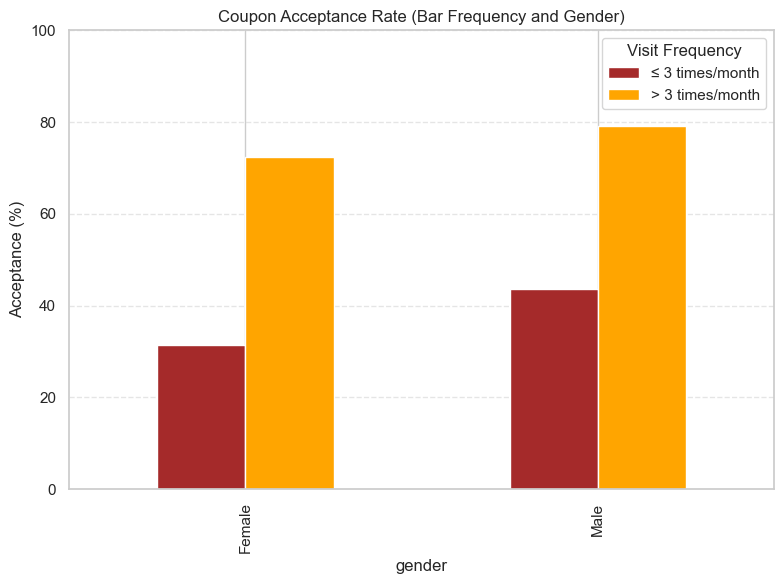

In [445]:

# frequency groupings
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

low_group = bardata[bardata['Bar'].isin(low_freq)]
high_group = bardata[bardata['Bar'].isin(high_freq)]

gender_low = low_group.groupby('gender')['Y'].mean() * 100
gender_high = high_group.groupby('gender')['Y'].mean() * 100

gender_df = pd.DataFrame({
    '≤ 3 times/month': gender_low,
    '> 3 times/month': gender_high
}).dropna()

gender_df.plot(kind='bar', figsize=(8, 6), color=['brown', 'orange'])

plt.title('Coupon Acceptance Rate (Bar Frequency and Gender)')
plt.ylabel('Acceptance (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Visit Frequency')
plt.tight_layout()
plt.show()

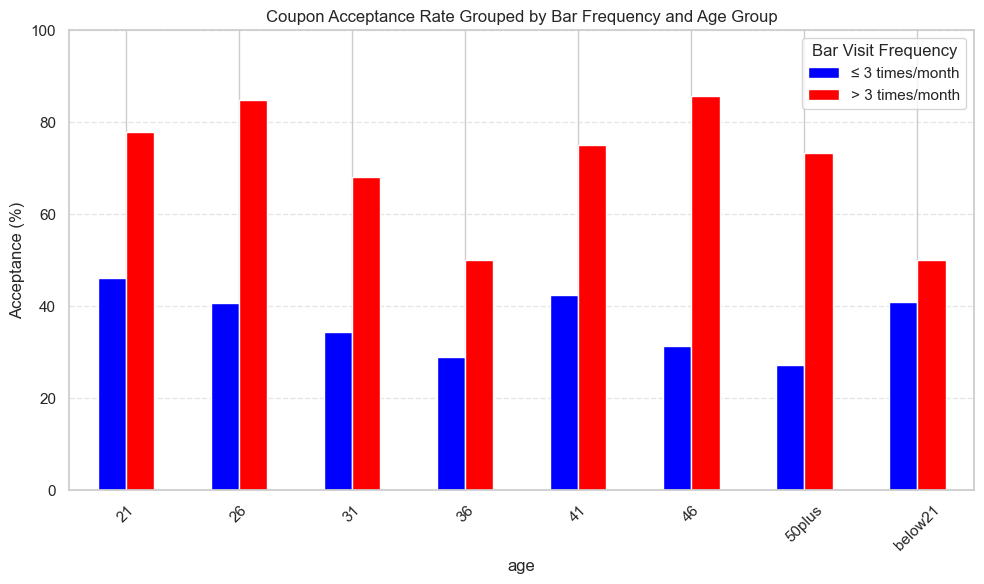

In [446]:

age_low = low_group.groupby('age')['Y'].mean() * 100
age_high = high_group.groupby('age')['Y'].mean() * 100

age_df = pd.DataFrame({
    '≤ 3 times/month': age_low,
    '> 3 times/month': age_high
}).dropna()

age_df.plot(kind='bar', figsize=(10, 6), color=['Blue', 'Red'])

plt.title('Coupon Acceptance Rate Grouped by Bar Frequency and Age Group')
plt.ylabel('Acceptance (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Bar Visit Frequency')
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


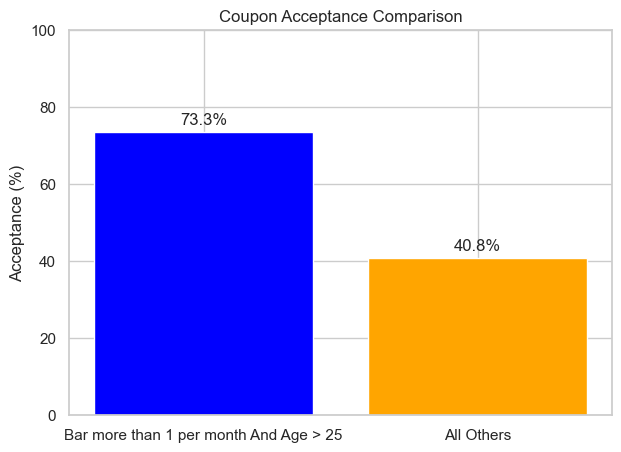

In [447]:

# Identify the groups required
bar_more_than_once = ['4~8', 'gt8']
age_over_25 = ['26-30', '31-35', '36-40', '41-45', '46-50', '50plus']

# Bar > once/month AND Age > 25
group_1 = bardata[
    (bardata['Bar'].isin(bar_more_than_once)) &
    (bardata['age'].isin(age_over_25))
]

group_2 = bardata[~bardata.index.isin(group_1.index)]

# rates of acceptance for each group
rate_1 = group_1['Y'].mean() * 100
rate_2 = group_2['Y'].mean() * 100

# Plotting
labels = ['Bar more than 1 per month And Age > 25', 'All Others']
acceptance_rates = [rate_1, rate_2]
colors = ['blue', 'orange']

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, acceptance_rates, color=colors)

# Annotate bars
plt.title('Coupon Acceptance Comparison')
plt.ylabel('Acceptance (%)')
plt.ylim(0, 100)

for bar, rate in zip(bars, acceptance_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{rate:.1f}%', ha='center', fontsize=12)

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


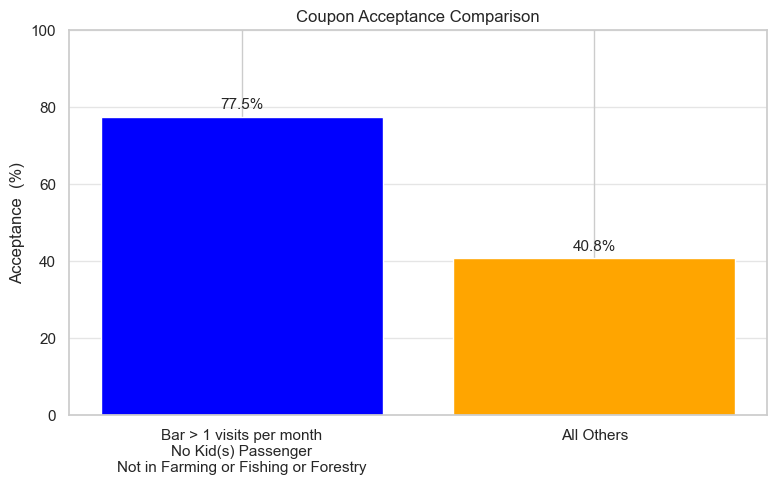

In [448]:

# define the groupings necessary
inbarmorethanonce = ['4~8', 'gt8']
kidpassenger = ['Kid(s)']
unwantedoccupation = ['farming', 'fishing', 'forestry']

group1 = bardata[
    (bardata['Bar'].isin(inbarmorethanonce)) &
    (~bardata['passenger'].isin(kidpassenger)) &
    (~bardata['occupation'].isin(unwantedoccupation))
]

# Group 2: all those NOT in group1
group2 = bardata[~bardata.index.isin(group_1.index)]

# rates
rate1 = group1['Y'].mean() * 100
rate2 = group2['Y'].mean() * 100

# Plotting
labels = [
    'Bar > 1 visits per month\nNo Kid(s) Passenger\nNot in Farming or Fishing or Forestry',
    'All Others'
]
acceptance_rates = [rate1, rate2]
colors = ['blue', 'orange']

plt.figure(figsize=(9, 5))
bars = plt.bar(labels, acceptance_rates, color=colors)

plt.title('Coupon Acceptance Comparison')
plt.ylabel('Acceptance  (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='-', alpha=0.5)

for bar, rate in zip(bars, acceptance_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{rate:.1f}%', ha='center', fontsize=11)

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



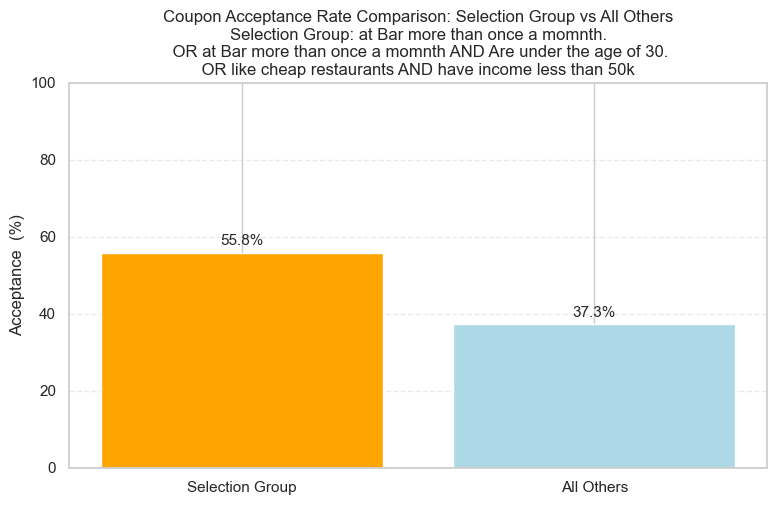

In [449]:

# Groupings groupings groupings :)
barmorethanonce = ['4~8', 'gt8']
under30years = ['below21', '21-25', '26-30']
lowcostrestaurantgreaterthan4 = ['4~8', 'gt8']
incomebrackets = [
    'less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]
# reference values for income:
#-> income <-
#income
#$25000 - $37499     2013
#$12500 - $24999     1831
#$37500 - $49999     1805
#$100000 or More     1736
#$50000 - $62499     1659
#Less than $12500    1042
#$87500 - $99999      895
#$75000 - $87499      857
#$62500 - $74999      846


# Define target group
group1 = bardata[
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['passenger'] != 'Kid(s)') &
        (bardata['maritalStatus'] != 'Widowed')
    )
    |
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['age'].isin(under30years))
    )
    |
    (
        (bardata['RestaurantLessThan20'].isin(lowcostrestaurantgreaterthan4)) &
        (bardata['income'].isin(incomebrackets))
    )
]

# not group1
group2 = bardata[~bardata.index.isin(group1.index)]

# Calculate acceptance rates
rate1 = group1['Y'].mean() * 100
rate2 = group2['Y'].mean() * 100

labels = ['Selection Group', 'All Others']
acceptance_rates = [rate1, rate2]
colors = ['orange', 'lightblue']

plt.figure(figsize=(9, 5))
bars = plt.bar(labels, acceptance_rates, color=colors)

# Annotate bars with percentage labels
plt.title('Coupon Acceptance Rate Comparison: Selection Group vs All Others\nSelection Group: at Bar more than once a momnth.\n OR at Bar more than once a momnth AND Are under the age of 30.\n OR like cheap restaurants AND have income less than 50k ')
plt.ylabel('Acceptance  (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar, rate in zip(bars, acceptance_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{rate:.1f}%', ha='center', fontsize=11)

plt.show()

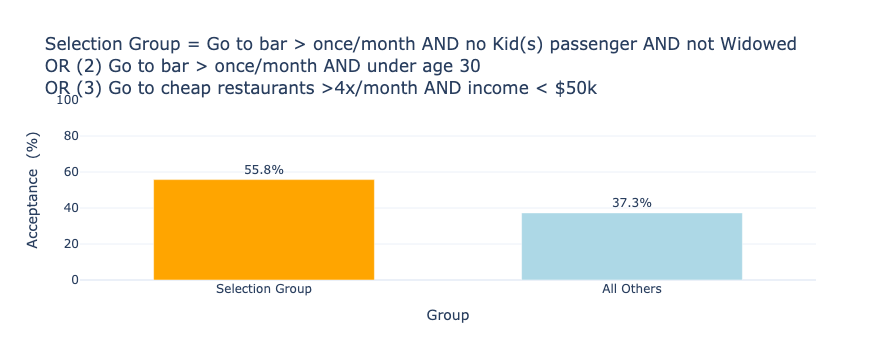

In [450]:
# use plotly for same chart as above
# Define groupings
barmorethanonce = ['4~8', 'gt8']
under30years = ['below21', '21-25', '26-30']
lowcostrestaurantgreaterthan4 = ['4~8', 'gt8']
incomebrackets = [
    'less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# Define Selection Group
group1 = bardata[
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['passenger'] != 'Kid(s)') &
        (bardata['maritalStatus'] != 'Widowed')
    )
    |
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['age'].isin(under30years))
    )
    |
    (
        (bardata['RestaurantLessThan20'].isin(lowcostrestaurantgreaterthan4)) &
        (bardata['income'].isin(incomebrackets))
    )
]

# Group 2: all others
group2 = bardata[~bardata.index.isin(group1.index)]

# Calculate acceptance rates
rate1 = group1['Y'].mean() * 100
rate2 = group2['Y'].mean() * 100

# Prepare data 
plot_df = pd.DataFrame({
    'Group': ['Selection Group', 'All Others'],
    'Acceptance Rate': [rate1, rate2]
})

# Create Plotly bar chart
fig = px.bar(
    plot_df,
    x='Group',
    y='Acceptance Rate',
    text='Acceptance Rate',
    color='Group',
    color_discrete_sequence=['orange', 'lightblue'],
    title=(
        "Selection Group = Go to bar > once/month AND no Kid(s) passenger AND not Widowed<br>"
        "OR (2) Go to bar > once/month AND under age 30<br>"
        "OR (3) Go to cheap restaurants >4x/month AND income < $50k<br>"
    )
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    yaxis_title='Acceptance  (%)',
    yaxis_range=[0, 100],
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    bargap=0.4,
    template='plotly_white',
    showlegend=False
)

fig.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Well, it appears that those who are more likely to accept a coupon to a bar have the following characteristics:
- Males between the ages of 21 and 30, with incomes less than 50k, who are not accompanied by a minor, on a sunny day.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

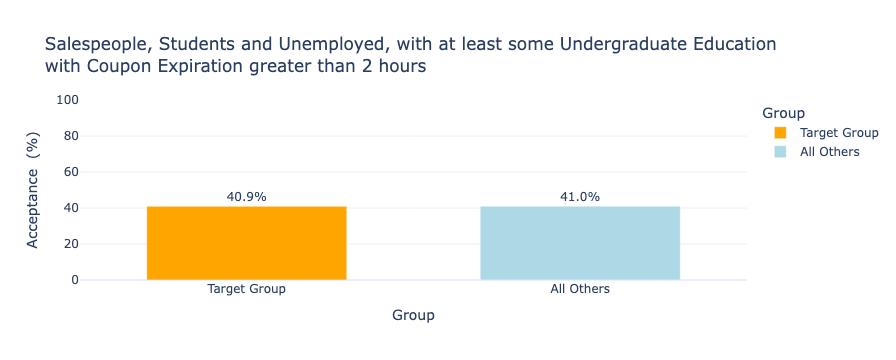

In [438]:
# use plotly 
# Define groupings
occupations = ['Sales & Related', 'Unemployed', 'Student']
expiration = ['1d']
education = ['Some college - no degree', 'Bachelors degree']
incomebrackets = [
    'less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# Define Selection Group
group1 = bardata[
    (
        (bardata['occupation'].isin(occupations)) &
        (bardata['expiration'].isin(expiration)) &
        (bardata['education'].isin(education))
    )
    
]

# Group 2: all others
group2 = bardata[~bardata.index.isin(group1.index)]

# Calculate acceptance rates
rate1 = group1['Y'].mean() * 100
rate2 = group2['Y'].mean() * 100

# Prepare data 
plot_df = pd.DataFrame({
    'Group': ['Target Group', 'All Others'],
    'Acceptance Rate': [rate1, rate2]
})

# Create Plotly bar chart
fig = px.bar(
    plot_df,
    x='Group',
    y='Acceptance Rate',
    text='Acceptance Rate',
    color='Group',
    color_discrete_sequence=['orange', 'lightblue'],
    title=(
        "Salespeople, Students and Unemployed, with at least some Undergraduate Education<br>"
        "with Coupon Expiration greater than 2 hours<br>"
    )
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    yaxis_title='Acceptance  (%)',
    yaxis_range=[0, 100],
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    bargap=0.4,
    template='plotly_white'
)

fig.show()

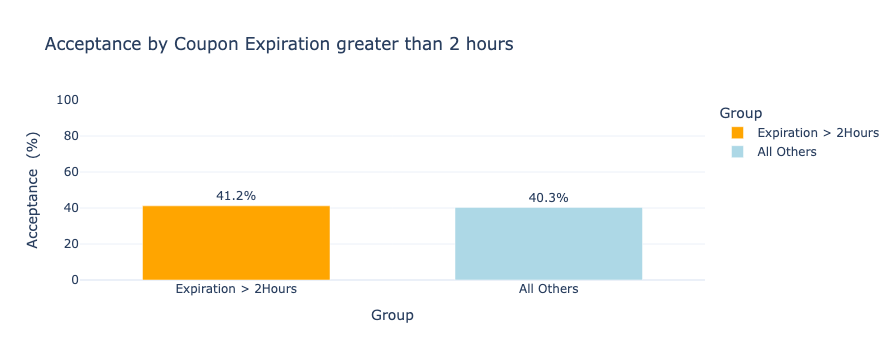

In [451]:
# use plotly 
# Define groupings
expiration = ['1d']

# Define Selection Group
group1 = bardata[
    (
        (bardata['expiration'].isin(expiration)) 
    )
    
]

# Group 2: all others
group2 = bardata[~bardata.index.isin(group1.index)]

# Calculate acceptance rates
rate1 = group1['Y'].mean() * 100
rate2 = group2['Y'].mean() * 100

# Prepare data 
plot_df = pd.DataFrame({
    'Group': ['Expiration > 2Hours', 'All Others'],
    'Acceptance Rate': [rate1, rate2]
})

# Create Plotly bar chart
fig = px.bar(
    plot_df,
    x='Group',
    y='Acceptance Rate',
    text='Acceptance Rate',
    color='Group',
    color_discrete_sequence=['orange', 'lightblue'],
    title=(

        " Acceptance by Coupon Expiration greater than 2 hours<br>"
    )
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    yaxis_title='Acceptance  (%)',
    yaxis_range=[0, 100],
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    bargap=0.4,
    template='plotly_white'
)

fig.show()

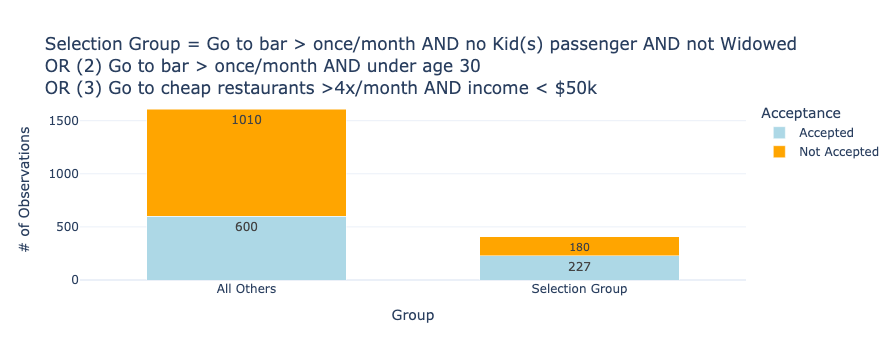

In [412]:

# Define groupings
barmorethanonce = ['4~8', 'gt8']
under30years = ['below21', '21-25', '26-30']
lowcostrestaurantgreaterthan4 = ['4~8', 'gt8']
incomebrackets = [
    'less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

group1 = bardata[
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['passenger'] != 'Kid(s)') &
        (bardata['maritalStatus'] != 'Widowed')
    )
    |
    (
        (bardata['Bar'].isin(barmorethanonce)) &
        (bardata['age'].isin(under30years))
    )
    |
    (
        (bardata['RestaurantLessThan20'].isin(lowcostrestaurantgreaterthan4)) &
        (bardata['income'].isin(incomebrackets))
    )
]

# Group 2: All others
group2 = bardata[~bardata.index.isin(group1.index)]

group1 = group1.copy()
group1['Group'] = 'Selection Group'

group2 = group2.copy()
group2['Group'] = 'All Others'

combined = pd.concat([group1, group2], axis=0)
combined['Acceptance'] = combined['Y'].map({1: 'Accepted', 0: 'Not Accepted'})


plot_df = combined.groupby(['Group', 'Acceptance']).size().reset_index(name='Count')

fig = px.bar(
    plot_df,
    x='Group',
    y='Count',
    color='Acceptance',
    text='Count',
    barmode='stack',
    color_discrete_sequence=['lightblue', 'orange'],
    title=(
        "Selection Group = Go to bar > once/month AND no Kid(s) passenger AND not Widowed<br>"
        "OR (2) Go to bar > once/month AND under age 30<br>"
        "OR (3) Go to cheap restaurants >4x/month AND income < $50k<br>"
    )
)

fig.update_traces(textposition='inside')
fig.update_layout(
    yaxis_title='# of Observations',
    bargap=0.4,
    template='plotly_white'
)

fig.show()